In [9]:
from dont_patronize_me import DontPatronizeMe
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
dpm = DontPatronizeMe('..', '..')

In [11]:
dpm.load_task1()
dpm.load_task2(return_one_hot=True)

Map of label to numerical label:
{'Unbalanced_power_relations': 0, 'Shallow_solution': 1, 'Presupposition': 2, 'Authority_voice': 3, 'Metaphors': 4, 'Compassion': 5, 'The_poorer_the_merrier': 6}


In [12]:
trids = pd.read_csv('../data/train_semeval_parids-labels.csv')
teids = pd.read_csv('../data/dev_semeval_parids-labels.csv')

In [13]:
trids.par_id = trids.par_id.astype(str)
teids.par_id = teids.par_id.astype(str)

In [14]:
data=dpm.train_task1_df

In [15]:
data

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0
...,...,...,...,...,...,...,...
10464,10465,@@14297363,women,lk,"""Sri Lankan norms and culture inhibit women fr...",0,1
10465,10466,@@70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0,0
10466,10467,@@20282330,in-need,ng,""""""" She has one huge platform , and informatio...",1,3
10467,10468,@@16753236,hopeless,in,""""""" Anja Ringgren Loven I ca n't find a word t...",1,4


In [16]:
data.label.value_counts()

label
0    9476
1     993
Name: count, dtype: int64

In [17]:
14.3/5.9

2.423728813559322

# Data analysis

**Ratio of label=1 samples per country**

C:\Users\alber\AppData\Local\Temp\ipykernel_444\3301158933.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(countryes1_ratio[-1])


0.05918367346938776


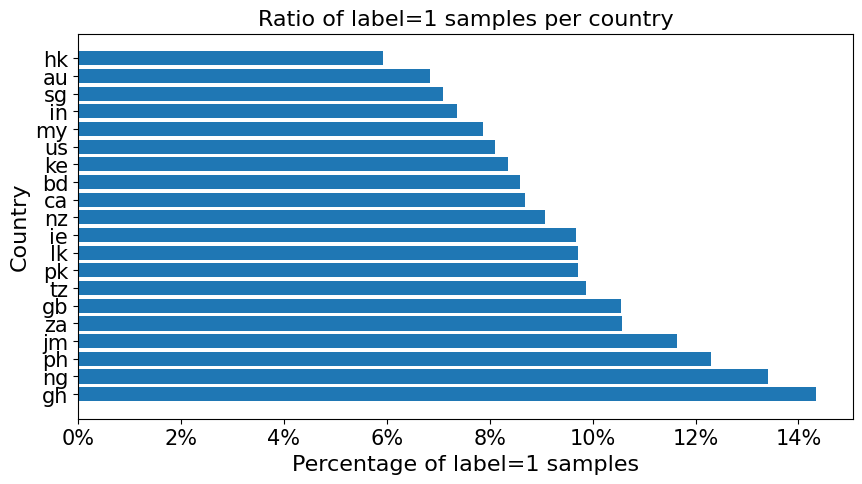

In [27]:
countryes = data['country'].value_counts()
countryes

# number of label=1 samples per country
countryes1 = data[data['label']==1]['country'].value_counts()

# ratio of label=1 samples per country
countryes1_ratio = countryes1/countryes
# sort the ratio in descending order
countryes1_ratio = countryes1_ratio.sort_values(ascending=False)
print(countryes1_ratio[-1])

# plot the ratio
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(countryes1_ratio.index, countryes1_ratio)
# set the x-axis to percentage
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.set_xlabel('Percentage of label=1 samples', fontsize=16)
ax.set_ylabel('Country', fontsize=16)
ax.set_title('Ratio of label=1 samples per country', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# ax.set_xticklabels(ax.get_xticks(), fontsize=15)
# ax.set_yticklabels(ax.get_yticks(), fontsize=15)
plt.show()

**Ration of label=1 samples per keyword**

C:\Users\alber\AppData\Local\Temp\ipykernel_444\2282401710.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


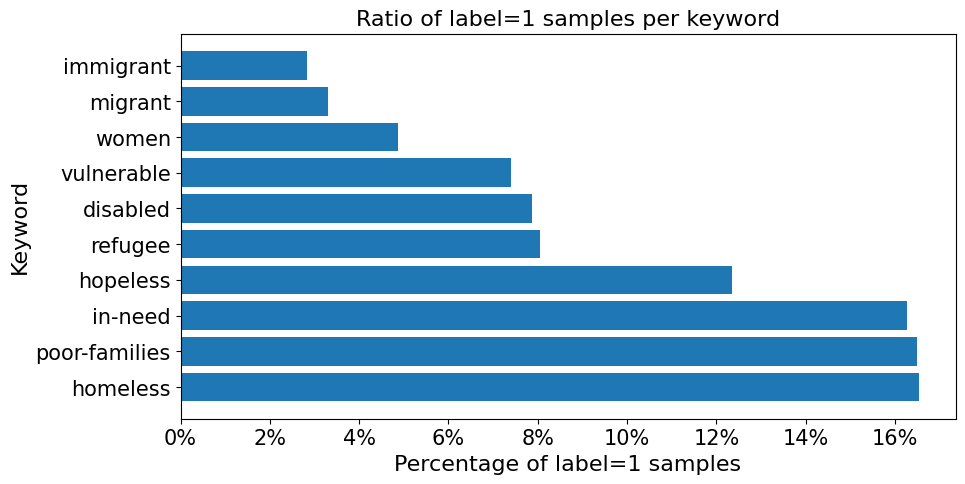

In [26]:
keywords = data['keyword'].value_counts()

# number of label=1 samples per country
keywords1 = data[data['label']==1]['keyword'].value_counts()
# ratio of label=1 samples per country
keywords1_ratio = keywords1/keywords
# sort the ratio in descending order
keywords1_ratio = keywords1_ratio.sort_values(ascending=False)
# plot horizontal bars
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(keywords1_ratio.index, keywords1_ratio)
# set the x-axis to percentage
ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
ax.set_xlabel('Percentage of label=1 samples', fontsize=16)
ax.set_ylabel('Keyword', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_title('Ratio of label=1 samples per keyword', fontsize=16)
plt.show()

**Average sentence length per country**

<BarContainer object of 20 artists>

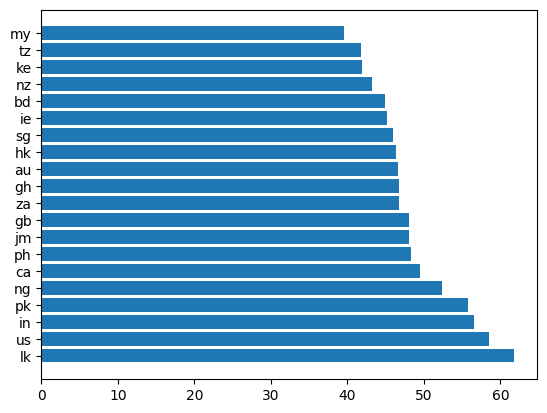

In [20]:
# average sentence length per country
data['sentence_length'] = data['text'].apply(lambda x: len(x.split()))
sentence_length_country = data.groupby('country')['sentence_length'].mean()
sentence_length_country = sentence_length_country.sort_values(ascending=False)
plt.barh(sentence_length_country.index, sentence_length_country)

**Average sentence length per keyword**

<BarContainer object of 10 artists>

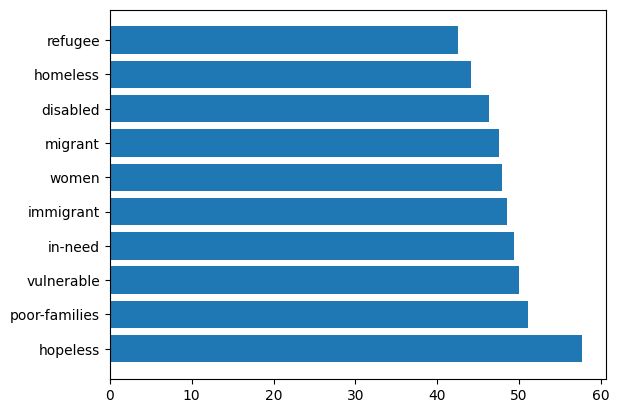

In [21]:
# average sentence length per keyword
sentence_length_keyword = data.groupby('keyword')['sentence_length'].mean()
sentence_length_keyword = sentence_length_keyword.sort_values(ascending=False)
plt.barh(sentence_length_keyword.index, sentence_length_keyword)

**Average sentence length per class**

<BarContainer object of 2 artists>

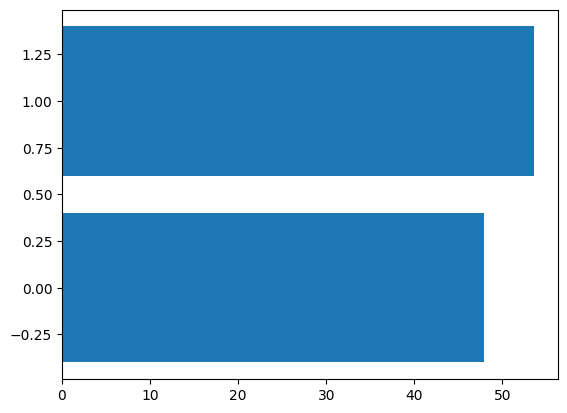

In [22]:
# average sentence length per label
sentence_length_label = data.groupby('label')['sentence_length'].mean()
sentence_length_label = sentence_length_label.sort_values(ascending=False)
plt.barh(sentence_length_label.index, sentence_length_label)

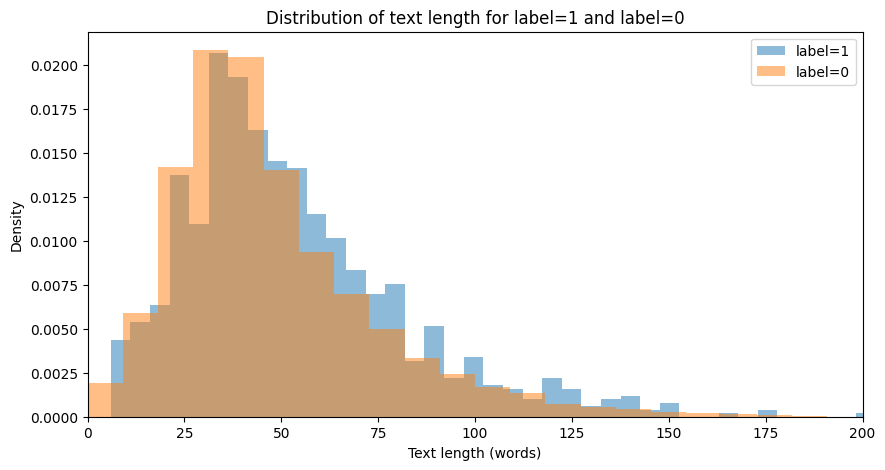

In [28]:
# get the distribution of length of the text for label=1 and label=0
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

bins = 100

# plot normalised histogram of text length for label=1 and label=0
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(data[data['label']==1]['text_length'], bins=bins, alpha=0.5, label='label=1', density=True)
ax.hist(data[data['label']==0]['text_length'], bins=bins, alpha=0.5, label='label=0', density=True)
ax.set_xlabel('Text length (words)')
ax.set_ylabel('Density')
# set x limits
ax.set_xlim(0, 200)
ax.set_title('Distribution of text length for label=1 and label=0')
ax.legend()
plt.show()